In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import pyproj
from shapely import geometry
import matplotlib.pyplot as plt


%matplotlib inline

In [2]:
mag_data = pd.read_csv('database/mag_data_raw.csv')
mag_data.head()

/home/silva/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,X,Y,ALTURA,MDT,MAGIGRF,LONGITUDE,LATITUDE,HORA
0,608357,8824711,93.43,306.89,36.347,-56.009375,-10.630428,14:43:45.7
1,608357,8824704,92.65,307.34,39.179,-56.009373,-10.630490,14:43:45.8
2,608357,8824697,91.87,307.82,41.939,-56.009373,-10.630552,14:43:45.9
3,608357,8824690,91.11,308.32,44.615,-56.009373,-10.630613,14:43:46.0
4,608357,8824684,90.37,308.79,47.205,-56.009373,-10.630677,14:43:46.1


In [3]:
mag_data.shape

(12926387, 8)

https://pypi.org/project/pyproj/

In [4]:
# South America WGS 84
p1 = pyproj.Proj("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs")
# WGS84 UTM
p2 = pyproj.Proj("+proj=utm +zone=21 +south +ellps=WGS84 +datum=WGS84 +units=m +no_defs")
mag_data['E_utm'], mag_data['N_utm'] = pyproj.transform(p1, p2,
                                                        mag_data.LONGITUDE.values,
                                                        mag_data.LATITUDE.values)
p3 = pyproj.Proj("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs")
mag_data['LONGITUDE'], mag_data['LATITUDE'] = pyproj.transform(p1, p3,
                                                        mag_data.LONGITUDE.values,
                                                        mag_data.LATITUDE.values)

In [5]:
mag_data['geometry'] = [geometry.Point(x, y) for x, y in zip(mag_data['E_utm'], mag_data['N_utm'])]

In [6]:
crs = "+proj=utm +zone=21 +south +ellps=WGS84 +datum=WGS84 +units=m +no_defs"
mag_data = gpd.GeoDataFrame(mag_data, geometry='geometry', crs=crs)
mag_data.head()

,X,Y,ALTURA,MDT,MAGIGRF,LONGITUDE,LATITUDE,HORA,E_utm,N_utm,geometry
0,608357,8824711,93.43,306.89,36.347,-56.009375,-10.630428,14:43:45.7,608357.317714,8.824711e+06,POINT (608357.318 8824711.010)
1,608357,8824704,92.65,307.34,39.179,-56.009373,-10.630490,14:43:45.8,608357.514630,8.824704e+06,POINT (608357.515 8824704.153)
2,608357,8824697,91.87,307.82,41.939,-56.009373,-10.630552,14:43:45.9,608357.492760,8.824697e+06,POINT (608357.493 8824697.297)
3,608357,8824690,91.11,308.32,44.615,-56.009373,-10.630613,14:43:46.0,608357.471243,8.824691e+06,POINT (608357.471 8824690.552)
4,608357,8824684,90.37,308.79,47.205,-56.009373,-10.630677,14:43:46.1,608357.448667,8.824683e+06,POINT (608357.449 8824683.474)


<AxesSubplot:>

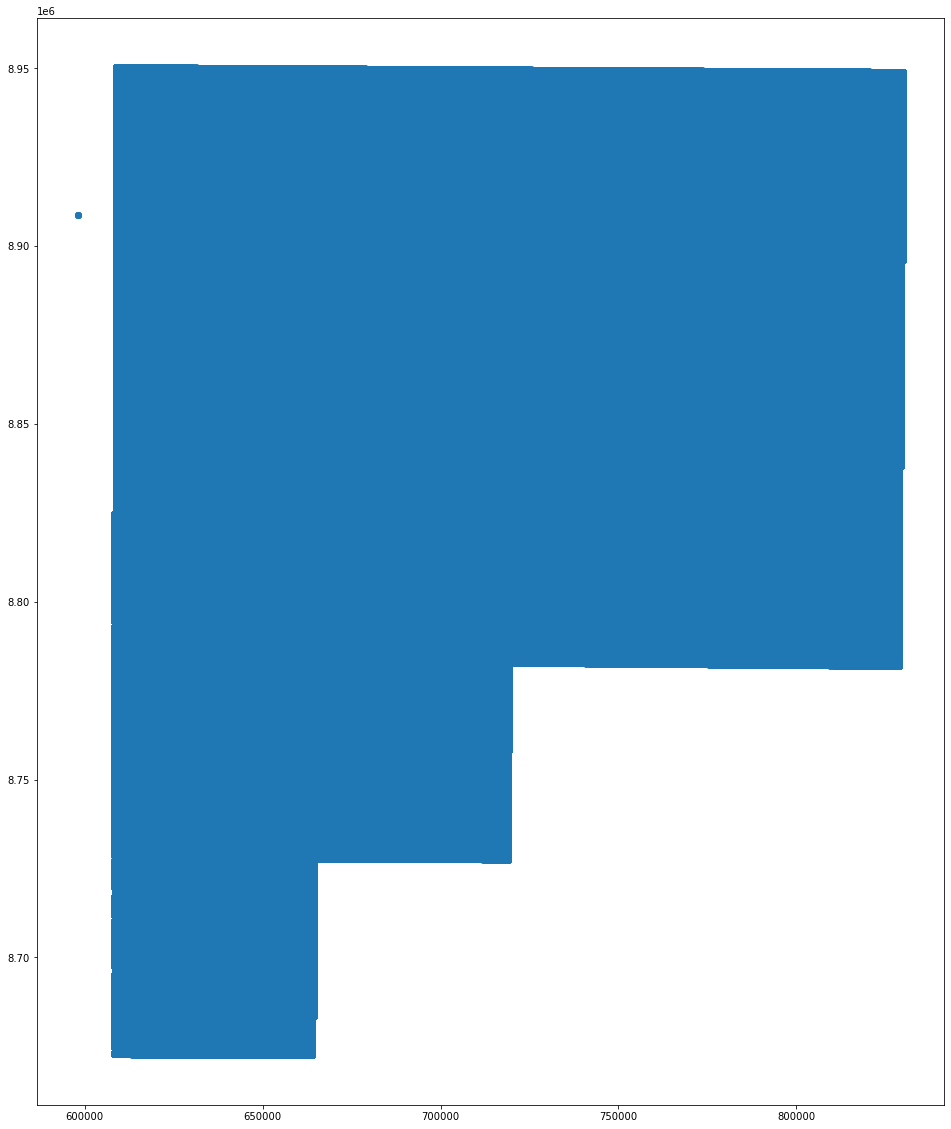

In [7]:
mag_data.plot(figsize = (20, 20))

In [7]:
gamma_data = pd.read_csv('database/gamma_data_raw.csv')
gamma_data.head()

,X,Y,KPERC,eU,eTh,LONGITUDE,LATITUDE
0,608357,8824690,2.595,7.122,27.322,-56.009373,-10.630615
1,608358,8824622,3.103,7.402,22.179,-56.009369,-10.631236
2,608358,8824553,3.657,7.389,20.263,-56.009365,-10.631860
3,608358,8824483,4.144,7.009,22.013,-56.009361,-10.632486
4,608358,8824414,4.432,6.365,26.112,-56.009357,-10.633114


In [8]:
gamma_data.shape

(1360914, 7)

In [9]:
# South America WGS 84
p1 = pyproj.Proj("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs")
# WGS84 UTM
p2 = pyproj.Proj("+proj=utm +zone=21 +south +ellps=WGS84 +datum=WGS84 +units=m +no_defs")
gamma_data['E_utm'], gamma_data['N_utm'] = pyproj.transform(p1, p2,
                                                        gamma_data.LONGITUDE.values,
                                                        gamma_data.LATITUDE.values)
p3 = pyproj.Proj("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs")
gamma_data['LONGITUDE'], gamma_data['LATITUDE'] = pyproj.transform(p1, p3,
                                                        gamma_data.LONGITUDE.values,
                                                        gamma_data.LATITUDE.values)

In [10]:
gamma_data['geometry'] = [geometry.Point(x, y) for x, y in zip(gamma_data['E_utm'], gamma_data['N_utm'])]

In [11]:
crs = "+proj=utm +zone=21 +south +ellps=WGS84 +datum=WGS84 +units=m +no_defs"
gamma_data = gpd.GeoDataFrame(gamma_data, geometry='geometry', crs=crs)
gamma_data.head()

,X,Y,KPERC,eU,eTh,LONGITUDE,LATITUDE,E_utm,N_utm,geometry
0,608357,8824690,2.595,7.122,27.322,-56.009373,-10.630615,608357.470537,8.824690e+06,POINT (608357.471 8824690.330)
1,608358,8824622,3.103,7.402,22.179,-56.009369,-10.631236,608357.689046,8.824622e+06,POINT (608357.689 8824621.657)
2,608358,8824553,3.657,7.389,20.263,-56.009365,-10.631860,608357.906483,8.824553e+06,POINT (608357.906 8824552.651)
3,608358,8824483,4.144,7.009,22.013,-56.009361,-10.632486,608358.123199,8.824483e+06,POINT (608358.123 8824483.425)
4,608358,8824414,4.432,6.365,26.112,-56.009357,-10.633114,608358.339195,8.824414e+06,POINT (608358.339 8824413.977)


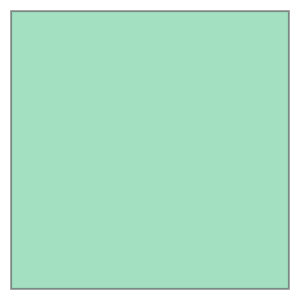

In [12]:
# borders limits
bounds = geometry.Polygon([(655000.0, 8800000.0), (805000.0, 8800000.0), 
                           (805000.0, 8950000.0), (655000.0, 8950000.0)])
area = bounds.area
bounds

In [13]:
cond1 = mag_data.intersects(bounds)
mag_data = mag_data[cond1]
cond2 = gamma_data.intersects(bounds)
gamma_data = gamma_data[cond2]

### Fatiando a Terra Functions

In [1]:
"""
Create and operate on grids and profiles.

**Grid generation**

* :func:`~fatiando.gridder.regular`
* :func:`~fatiando.gridder.scatter`

**Grid operations**

* :func:`~fatiando.gridder.cut`
* :func:`~fatiando.gridder.profile`

**Interpolation**

* :func:`~fatiando.gridder.interp`
* :func:`~fatiando.gridder.interp_at`
* :func:`~fatiando.gridder.extrapolate_nans`

**Input/Output**

* :func:`~fatiando.gridder.load_surfer`: Read a Surfer grid file and return
  three 1d numpy arrays and the grid shape

**Misc**

* :func:`~fatiando.gridder.spacing`

----

"""

import numpy
import scipy.interpolate
import matplotlib.mlab


def load_surfer(fname, fmt='ascii'):
    """
    Read a Surfer grid file and return three 1d numpy arrays and the grid shape

    Surfer is a contouring, gridding and surface mapping software
    from GoldenSoftware. The names and logos for Surfer and Golden
    Software are registered trademarks of Golden Software, Inc.

    http://www.goldensoftware.com/products/surfer

    According to Surfer structure, x and y are horizontal and vertical
    screen-based coordinates respectively. If the grid is in geographic
    coordinates, x will be longitude and y latitude. If the coordinates
    are cartesian, x will be the easting and y the norting coordinates.

    WARNING: This is opposite to the convention used for Fatiando.
    See io_surfer.py in cookbook.

    Parameters:

    * fname : str
        Name of the Surfer grid file
    * fmt : str
        File type, can be 'ascii' or 'binary'

    Returns:

    * x : 1d-array
        Value of the horizontal coordinate of each grid point.
    * y : 1d-array
        Value of the vertical coordinate of each grid point.
    * grd : 1d-array
        Values of the field in each grid point. Field can be for example
        topography, gravity anomaly etc
    * shape : tuple = (ny, nx)
        The number of points in the vertical and horizontal grid dimensions,
        respectively

    """
    assert fmt in ['ascii', 'binary'], "Invalid grid format '%s'. Should be \
        'ascii' or 'binary'." % (fmt)
    if fmt == 'ascii':
        # Surfer ASCII grid structure
        # DSAA            Surfer ASCII GRD ID
        # nCols nRows     number of columns and rows
        # xMin xMax       X min max
        # yMin yMax       Y min max
        # zMin zMax       Z min max
        # z11 z21 z31 ... List of Z values
        with open(fname) as ftext:
            # DSAA is a Surfer ASCII GRD ID
            id = ftext.readline()
            # Read the number of columns (nx) and rows (ny)
            nx, ny = [int(s) for s in ftext.readline().split()]
            # Read the min/max value of x (columns/longitue)
            xmin, xmax = [float(s) for s in ftext.readline().split()]
            # Read the min/max value of  y(rows/latitude)
            ymin, ymax = [float(s) for s in ftext.readline().split()]
            # Read the min/max value of grd
            zmin, zmax = [float(s) for s in ftext.readline().split()]
            data = numpy.fromiter((float(i) for line in ftext for i in
                                   line.split()), dtype='f')
            grd = numpy.ma.masked_greater_equal(data, 1.70141e+38)
        # Create x and y numpy arrays
        x = numpy.linspace(xmin, xmax, nx)
        y = numpy.linspace(ymin, ymax, ny)
        x, y = [tmp.ravel() for tmp in numpy.meshgrid(x, y)]
    if fmt == 'binary':
        raise NotImplementedError(
            "Binary file support is not implemented yet.")
    return x, y, grd, (ny, nx)

def regular(area, shape, z=None):
    """
    Create a regular grid. Order of the output grid is x varies first, then y.

    Parameters:

    * area
        ``(x1, x2, y1, y2)``: Borders of the grid
    * shape
        Shape of the regular grid, ie ``(ny, nx)``.
    * z
        Optional. z coordinate of the grid points. If given, will return an
        array with the value *z*.

    Returns:

    * ``[xcoords, ycoords]``
        Numpy arrays with the x and y coordinates of the grid points
    * ``[xcoords, ycoords, zcoords]``
        If *z* given. Numpy arrays with the x, y, and z coordinates of the grid
        points

    """
    ny, nx = shape
    x1, x2, y1, y2 = area
    dy, dx = spacing(area, shape)
    x_range = numpy.arange(x1, x2, dx)
    y_range = numpy.arange(y1, y2, dy)
    # Need to make sure that the number of points in the grid is correct
    # because of rounding errors in arange. Sometimes x2 and y2 are included,
    # sometimes not
    if len(x_range) < nx:
        x_range = numpy.append(x_range, x2)
    if len(y_range) < ny:
        y_range = numpy.append(y_range, y2)
    assert len(x_range) == nx, "Failed! x_range doesn't have nx points"
    assert len(y_range) == ny, "Failed! y_range doesn't have ny points"
    xcoords, ycoords = [mat.ravel()
                        for mat in numpy.meshgrid(x_range, y_range)]
    if z is not None:
        zcoords = z * numpy.ones_like(xcoords)
        return [xcoords, ycoords, zcoords]
    else:
        return [xcoords, ycoords]

def scatter(area, n, z=None, seed=None):
    """
    Create an irregular grid with a random scattering of points.

    Parameters:

    * area
        ``(x1, x2, y1, y2)``: Borders of the grid
    * n
        Number of points
    * z
        Optional. z coordinate of the points. If given, will return an
        array with the value *z*.
    * seed : None or int
        Seed used to generate the pseudo-random numbers. If `None`, will use a
        different seed every time. Use the same seed to generate the same
        random points.

    Returns:

    * ``[xcoords, ycoords]``
        Numpy arrays with the x and y coordinates of the points
    * ``[xcoords, ycoords, zcoords]``
        If *z* given. Arrays with the x, y, and z coordinates of the points

    """
    x1, x2, y1, y2 = area
    numpy.random.seed(seed)
    xcoords = numpy.random.uniform(x1, x2, n)
    ycoords = numpy.random.uniform(y1, y2, n)
    numpy.random.seed()
    if z is not None:
        zcoords = z * numpy.ones(n)
        return [xcoords, ycoords, zcoords]
    else:
        return [xcoords, ycoords]

def spacing(area, shape):
    """
    Returns the spacing between grid nodes

    Parameters:

    * area
        ``(x1, x2, y1, y2)``: Borders of the grid
    * shape
        Shape of the regular grid, ie ``(ny, nx)``.

    Returns:

    * ``[dy, dx]``
        Spacing the y and x directions

    """
    x1, x2, y1, y2 = area
    ny, nx = shape
    dx = float(x2 - x1) / float(nx - 1)
    dy = float(y2 - y1) / float(ny - 1)
    return [dy, dx]

def interp(x, y, v, shape, area=None, algorithm='cubic', extrapolate=False):
    """
    Interpolate data onto a regular grid.

    Parameters:

    * x, y : 1D arrays
        Arrays with the x and y coordinates of the data points.
    * v : 1D array
        Array with the scalar value assigned to the data points.
    * shape : tuple = (ny, nx)
        Shape of the interpolated regular grid, ie (ny, nx).
    * area : tuple = (x1, x2, y1, y2)
        The are where the data will be interpolated. If None, then will get the
        area from *x* and *y*.
    * algorithm : string
        Interpolation algorithm. Either ``'cubic'``, ``'nearest'``,
        ``'linear'`` (see scipy.interpolate.griddata), or ``'nn'`` for nearest
        neighbors (using matplotlib.mlab.griddata)
    * extrapolate : True or False
        If True, will extrapolate values outside of the convex hull of the data
        points.

    Returns:

    * ``[x, y, v]``
        Three 1D arrays with the interpolated x, y, and v

    """
    if algorithm not in ['cubic', 'linear', 'nearest', 'nn']:
        raise ValueError("Invalid interpolation algorithm: " + str(algorithm))
    ny, nx = shape
    if area is None:
        area = (x.min(), x.max(), y.min(), y.max())
    x1, x2, y1, y2 = area
    xs = numpy.linspace(x1, x2, nx)
    ys = numpy.linspace(y1, y2, ny)
    xp, yp = [i.ravel() for i in numpy.meshgrid(xs, ys)]
    if algorithm == 'nn':
        grid = matplotlib.mlab.griddata(x, y, v, numpy.reshape(xp, shape),
                                        numpy.reshape(yp, shape),
                                        interp='nn').ravel()
        if extrapolate and numpy.ma.is_masked(grid):
            grid = extrapolate_nans(xp, yp, grid)
    else:
        grid = interp_at(x, y, v, xp, yp, algorithm=algorithm,
                         extrapolate=extrapolate)
    return [xp, yp, grid]


def interp_at(x, y, v, xp, yp, algorithm='cubic', extrapolate=False):
    """
    Interpolate data onto the specified points.

    Parameters:

    * x, y : 1D arrays
        Arrays with the x and y coordinates of the data points.
    * v : 1D array
        Array with the scalar value assigned to the data points.
    * xp, yp : 1D arrays
        Points where the data values will be interpolated
    * algorithm : string
        Interpolation algorithm. Either ``'cubic'``, ``'nearest'``,
        ``'linear'`` (see scipy.interpolate.griddata)
    * extrapolate : True or False
        If True, will extrapolate values outside of the convex hull of the data
        points.

    Returns:

    * v : 1D array
        1D array with the interpolated v values.

    """
    if algorithm not in ['cubic', 'linear', 'nearest']:
        raise ValueError("Invalid interpolation algorithm: " + str(algorithm))
    grid = scipy.interpolate.griddata((x, y), v, (xp, yp),
                                      method=algorithm).ravel()
    if extrapolate and algorithm != 'nearest' and numpy.any(numpy.isnan(grid)):
        grid = extrapolate_nans(xp, yp, grid)
    return grid

def profile(x, y, v, point1, point2, size, extrapolate=False):
    """
    Extract a data profile between 2 points.

    Uses interpolation to calculate the data values at the profile points.

    Parameters:

    * x, y : 1D arrays
        Arrays with the x and y coordinates of the data points.
    * v : 1D array
        Array with the scalar value assigned to the data points.
    * point1, point2 : lists = [x, y]
        Lists the x, y coordinates of the 2 points between which the profile
        will be extracted.
    * size : int
        Number of points along the profile.
    * extrapolate : True or False
        If True, will extrapolate values outside of the convex hull of the data
        points.

    Returns:

    * [xp, yp, distances, vp] : 1d arrays
        ``xp`` and ``yp`` are the x, y coordinates of the points along the
        profile.
        ``distances`` are the distances of the profile points to ``point1``
        ``vp`` are the data points along the profile.

    """
    x1, y1 = point1
    x2, y2 = point2
    maxdist = numpy.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)
    distances = numpy.linspace(0, maxdist, size)
    angle = numpy.arctan2(y2 - y1, x2 - x1)
    xp = x1 + distances * numpy.cos(angle)
    yp = y1 + distances * numpy.sin(angle)
    vp = interp_at(x, y, v, xp, yp, algorithm='cubic', extrapolate=extrapolate)
    return xp, yp, distances, vp


def extrapolate_nans(x, y, v):
    """"
    Extrapolate the NaNs or masked values in a grid INPLACE using nearest
    value.

    .. warning:: Replaces the NaN or masked values of the original array!

    Parameters:

    * x, y : 1D arrays
        Arrays with the x and y coordinates of the data points.
    * v : 1D array
        Array with the scalar value assigned to the data points.

    Returns:

    * v : 1D array
        The array with NaNs or masked values extrapolated.

    """
    if numpy.ma.is_masked(v):
        nans = v.mask
    else:
        nans = numpy.isnan(v)
    notnans = numpy.logical_not(nans)
    v[nans] = scipy.interpolate.griddata((x[notnans], y[notnans]), v[notnans],
                                         (x[nans], y[nans]),
                                         method='nearest').ravel()
    return v


def cut(x, y, scalars, area):
    """
    Return a subsection of a grid.

    The returned subsection is not a copy! In technical terms, returns a slice
    of the numpy arrays. So changes made to the subsection reflect on the
    original grid. Use numpy.copy to make copies of the subsections and avoid
    this.

    Parameters:

    * x, y
        Arrays with the x and y coordinates of the data points.
    * scalars
        List of arrays with the scalar values assigned to the grid points.
    * area
        ``(x1, x2, y1, y2)``: Borders of the subsection

    Returns:

    * ``[subx, suby, subscalars]``
        Arrays with x and y coordinates and scalar values of the subsection.

    """
    xmin, xmax, ymin, ymax = area
    if len(x) != len(y):
        raise ValueError("x and y must have the same length")
    inside = [i for i in xrange(len(x))
              if x[i] >= xmin and x[i] <= xmax
              and y[i] >= ymin and y[i] <= ymax]
    return [x[inside], y[inside], [s[inside] for s in scalars]]

### Creating a universal grid for the project

In [2]:
# creating a grid with cells 100 x 375m
xu, yu = regular(shape = (1500, 400),
                     area = (655345.0, 805345.0, 
                             8800000.0, 8950000.0))

In [5]:
sx, sy = spacing(shape = (1500, 300),
                     area = (655345.0, 805345.0, 
                             8800000.0, 8950000.0))

In [6]:
print(sx, sy)

100.0667111407605 501.67224080267556


In [160]:
x1, y1 = np.array(mag_data.E_utm), np.array(mag_data.N_utm)

In [ ]:
RESMAG = np.array(mag_data.RESMAG)

In [161]:
x2, y2 = coordinates

#### Magnetic data interpolation

In [162]:
v_mag_ = interp_at(x1, y1, RESMAG, xu, yu, algorithm = 'cubic', extrapolate = True)

In [163]:
mdt_ = interp_at(x1, y1, MDT, xu, yu, algorithm = 'cubic', extrapolate = True)

#### Gamma data interpolation

In [164]:
eth_ = interp_at(x2, y2, eTh, xu, yu, algorithm = 'cubic', extrapolate = True)
eu_ = interp_at(x2, y2, eU, xu, yu, algorithm = 'cubic', extrapolate = True)
kperc_ = interp_at(x2, y2, KPERC, xu, yu, algorithm = 'cubic', extrapolate = True)

In [165]:
# intialise data of lists. 
data = {'E_UTM':xu, 'N_UTM':yu, 'MDT': mdt_, 'RESMAG': v_mag_, 
        'KPERC': kperc_, 'eU':eu_, 'eTh': eth_} 
  
# Create DataFrame 
geo_data = pd.DataFrame(data) 
  
# Print the output. 
geo_data

,E_UTM,N_UTM,MDT,RESMAG,KPERC,eU,eTh
0,655345.000000,8800000.0,362.134337,8.028541,2.209606,5.090386,27.982914
1,655720.939850,8800000.0,359.712764,3.699131,1.732699,4.617755,29.475015
2,656096.879699,8800000.0,349.375544,-14.591963,1.697072,4.599531,25.768364
3,656472.819549,8800000.0,335.108407,-43.604084,2.477438,5.125191,22.283531
4,656848.759398,8800000.0,331.273139,-46.230038,3.119514,5.319892,25.032831
...,...,...,...,...,...,...,...
599995,803841.240602,8950000.0,372.542221,-69.452394,0.368251,2.221391,11.285533
599996,804217.180451,8950000.0,371.892408,-62.680656,0.368251,2.221391,11.285533
599997,804593.120301,8950000.0,370.519647,-66.959190,0.354498,3.420154,15.221906
599998,804969.060150,8950000.0,370.519647,-66.959190,0.354498,3.420154,15.221906


In [172]:
geo_data.to_csv('database/geo_data.csv', index = False, index_label= False)

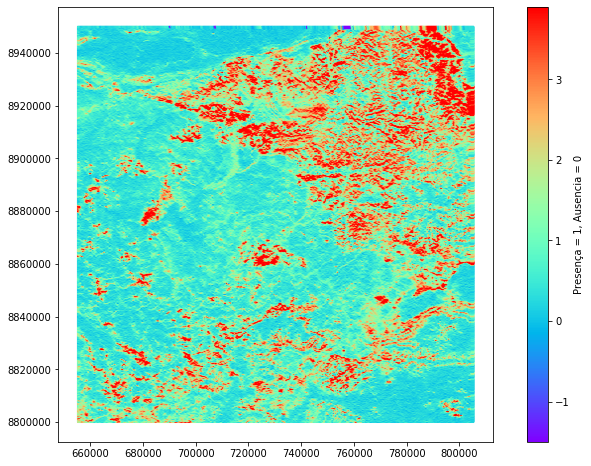

In [173]:
plt.scatter(geo_data.E_UTM, geo_data.N_UTM, cmap='rainbow', s=1, c=geo_data.KPERC, vmin=-1.5, vmax=3.9)
plt.colorbar(label=u'Presença = 1, Ausencia = 0')
plt.gca().set_aspect('equal')
plt.gcf().set_size_inches(12, 8)

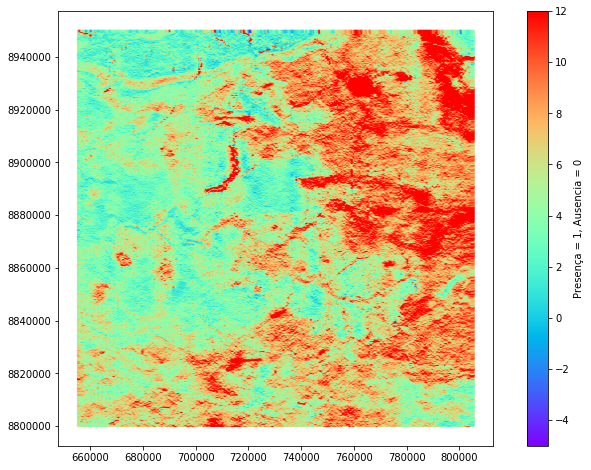

In [174]:
plt.scatter(geo_data.E_UTM, geo_data.N_UTM, cmap='rainbow', s=1, c=geo_data.eU, vmin=-5, vmax=12)
plt.colorbar(label=u'Presença = 1, Ausencia = 0')
plt.gca().set_aspect('equal')
plt.gcf().set_size_inches(12, 8)

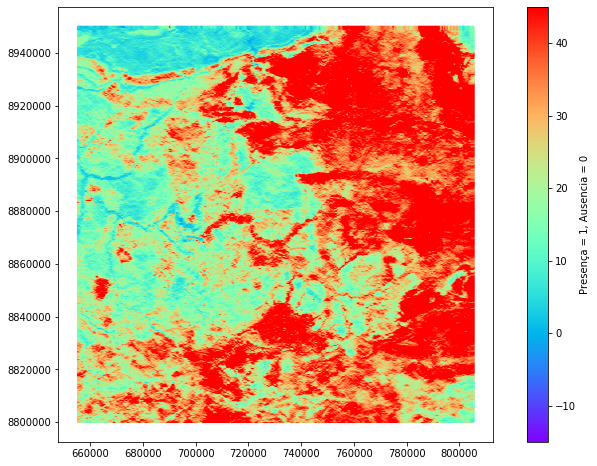

In [169]:
plt.scatter(geo_data.E_UTM, geo_data.N_UTM, cmap='rainbow', s=1, c=geo_data.eTh, vmin=-15, vmax=45)
plt.colorbar(label=u'Presença = 1, Ausencia = 0')
plt.gca().set_aspect('equal')
plt.gcf().set_size_inches(12, 8)

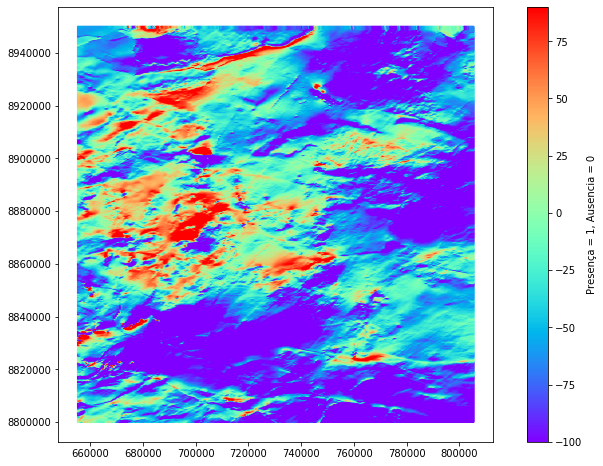

In [170]:
plt.scatter(geo_data.E_UTM, geo_data.N_UTM, cmap='rainbow', s=1, c=geo_data.RESMAG, vmin=-100, vmax=90)
plt.colorbar(label=u'Presença = 1, Ausencia = 0')
plt.gca().set_aspect('equal')
plt.gcf().set_size_inches(12, 8)

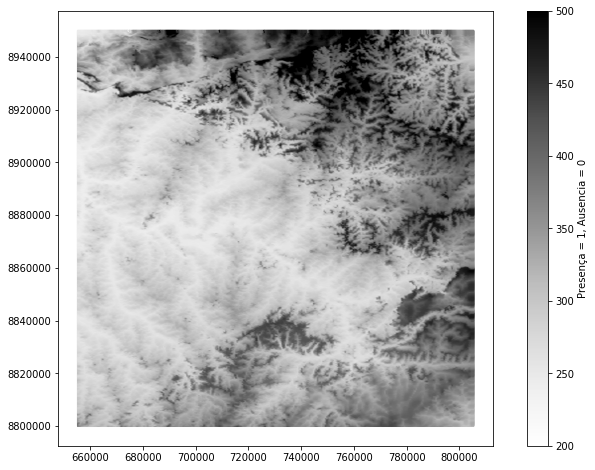

In [171]:
plt.scatter(geo_data.E_UTM, geo_data.N_UTM, cmap='Greys', s=1, c=geo_data.MDT, vmin=200, vmax=500)
plt.colorbar(label=u'Presença = 1, Ausencia = 0')
plt.gca().set_aspect('equal')
plt.gcf().set_size_inches(12, 8)